# **Unsharp masking:**
Blurring image using Gaussian/Average smoothing  <br>
Substract the blurred image from the original image (Mask) <br>
Adding the mask to the original image



In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2
from PIL import Image
from skimage import io, img_as_float

In [2]:
PATH1 = 'image1.JPG'
PATH2 = 'image2.JPG'

img = cv2.imread(PATH1)[:,:,::-1]
img = img.astype(np.float32)
img2 = cv2.imread(PATH2)[:,:,::-1]
img2 = img2.astype(np.float32)

print (img.max(), img.min())

255.0 0.0


Note that the image data type was changed to float32 so as to accommodate it with the mathematical operations we are to apply to it, this shall allow us to avoid overflow in image pixel values

Text(0.5, 1.0, 'Average smoothing')

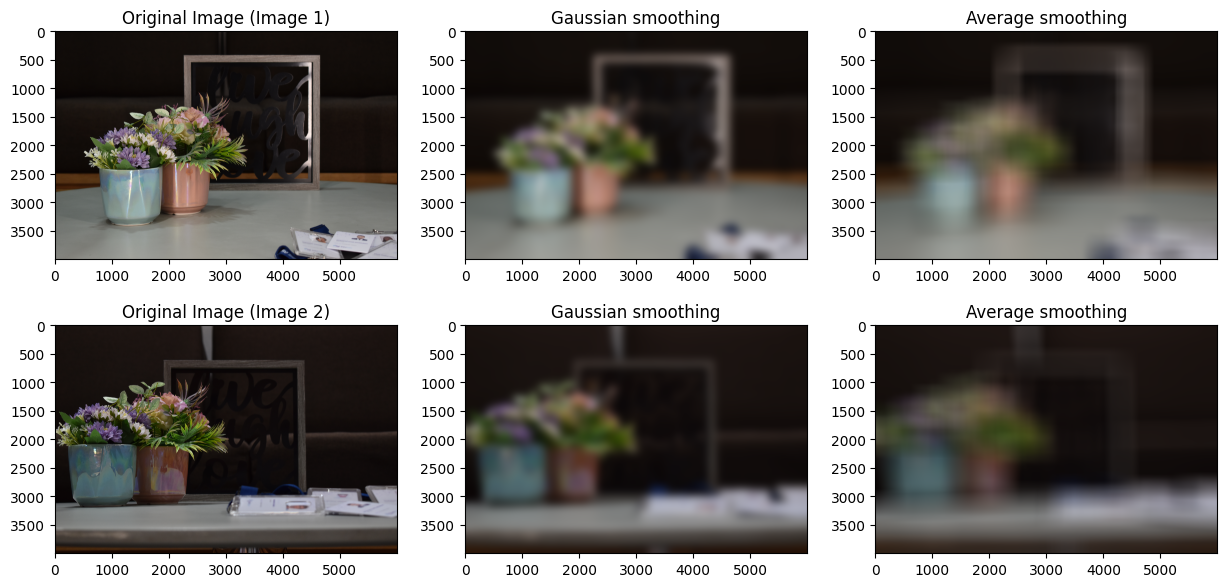

In [3]:
# Applying gaussian blur function provided by OpenCV library (image 1 & 2)
sigma = 0
gau_smoothed = cv2.GaussianBlur(img, (501,501), sigma)
gau_smoothed2 = cv2.GaussianBlur(img2, (501,501), sigma)

# Applying average blur function provided by OpenCV library (image 1 & 2)
avg_smoothed = cv2.blur(img, (501,501))
avg_smoothed2 = cv2.blur(img2, (501,501))

fig, axs = plt.subplots(2, 3,figsize=(15, 7))

# Plot original image
axs[0][0].imshow(np.clip(img, 0, 255).astype(np.uint8))
axs[0][0].set_title("Original Image (Image 1)")

# Plot Gaussian smoothed image
axs[0][1].imshow(np.clip(gau_smoothed, 0, 255).astype(np.uint8))
axs[0][1].set_title("Gaussian smoothing")

# Plot Average smoothed image
axs[0][2].imshow(np.clip(avg_smoothed, 0, 255).astype(np.uint8))
axs[0][2].set_title("Average smoothing")

# Second image:
# Plot original image
axs[1][0].imshow(np.clip(img2, 0, 255).astype(np.uint8))
axs[1][0].set_title("Original Image (Image 2)")

# Plot Gaussian smoothed image
axs[1][1].imshow(np.clip(gau_smoothed2, 0, 255).astype(np.uint8))
axs[1][1].set_title("Gaussian smoothing")

# Plot Average smoothed image
axs[1][2].imshow(np.clip(avg_smoothed2, 0, 255).astype(np.uint8))
axs[1][2].set_title("Average smoothing")


As it is evident from the pictures, gaussian smoothing give better blur results than averaging, hence it is likely to peform better when substracting it with the original for a crispier image. <br>
Note: High kernel window was used for illustrating purpose, and it will be changed for optimum results ("trial and error" approach is used)

**Now we substract the smoothed image (mask) from the original image**

Text(0.5, 1.0, 'Averaging mask (Image 2)')

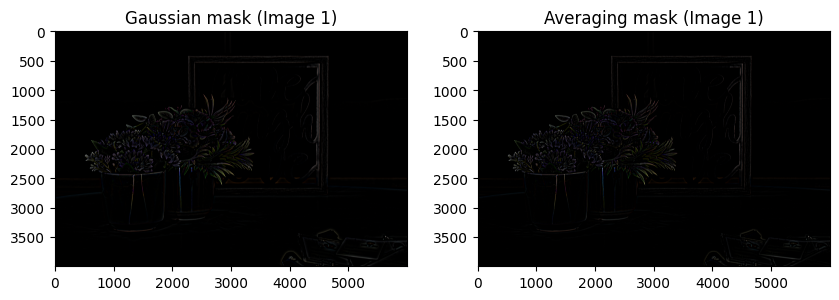

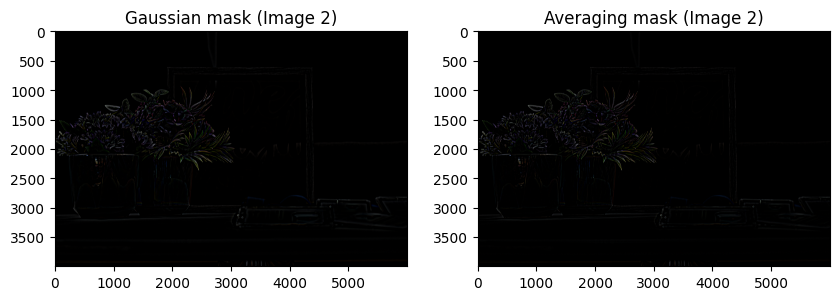

In [4]:
# Now substract the original image from gaussian smoothed image to get the mask (Image 1 & 2)

sigma = 20
gau_smoothed1 = cv2.GaussianBlur(img, (0,0), sigma)
gau_mask1 = cv2.subtract(img, gau_smoothed1)

gau_smoothed2 = cv2.GaussianBlur(img2, (0,0), sigma)
gau_mask2 = cv2.subtract(img2, gau_smoothed2)


avg_smoothed1 = cv2.blur(img, (51,51))
avg_mask1 = cv2.subtract(img, avg_smoothed1)

avg_smoothed2 = cv2.blur(img2, (51,51))
avg_mask2 = cv2.subtract(img2, avg_smoothed2)


# Plotting the mask of average & gaussian smoothing (Image 1 & 2)
fig, axs = plt.subplots(1, 2,figsize=(10, 5))

axs[0].imshow(np.clip(gau_mask1, 0, 255).astype(np.uint8))
axs[0].set_title("Gaussian mask (Image 1)")

axs[1].imshow(np.clip(avg_mask1, 0, 255).astype(np.uint8))
axs[1].set_title("Averaging mask (Image 1)")

fig, axs = plt.subplots(1, 2,figsize=(10, 5))

axs[0].imshow(np.clip(gau_mask2, 0, 255).astype(np.uint8))
axs[0].set_title("Gaussian mask (Image 2)")

axs[1].imshow(np.clip(avg_mask2, 0, 255).astype(np.uint8))
axs[1].set_title("Averaging mask (Image 2)")

We'll be relying on gaussian mask for the next steps since it provides better highlights over the objects

**Here we calculate the unsharped image by adding the mask to the original image**

Text(0.5, 1.0, 'Unsharp masking (Image 2)')

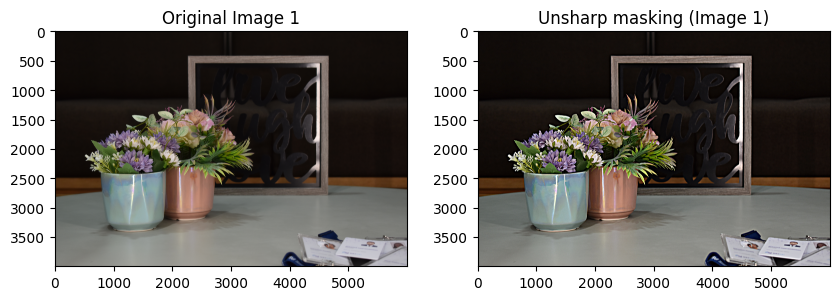

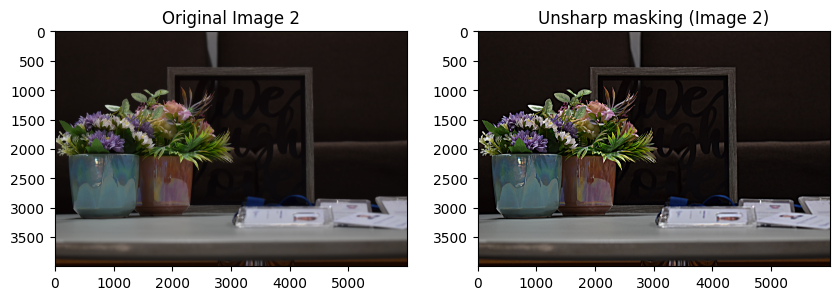

In [5]:
# Applying unsharp masking formula

a = 1
# Image 1
sharp1 = img + (a * gau_mask1)
# Image 2
sharp2 = img2 + (a * gau_mask2)


#print(np.max(sharp2[:,:,2].flatten()))

fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(np.clip(img, 0, 255).astype(np.uint8))
axs[0].set_title("Original Image 1")
axs[1].imshow(np.clip(sharp1, 0, 255).astype(np.uint8))
axs[1].set_title("Unsharp masking (Image 1)")

fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(np.clip(img2, 0, 255).astype(np.uint8))
axs[0].set_title("Original Image 2")
axs[1].imshow(np.clip(sharp2, 0, 255).astype(np.uint8))
axs[1].set_title("Unsharp masking (Image 2)")

The output of the unsharp masking shows better highlights in the regions where pixel values change dramatically, thus allowing better observation of different color variations and objects within the image. In this example, some flowers appears to be easier to distinguish from the others when observed in the sharped image than the original. In addition, the words written in the woden frame are much sharper and easier to read, especially when applying the highboost filtering as in the next cell.

Let's try greater 'a' value and see how it effects the result (Highboost filtering)

Text(0.5, 1.0, 'Unsharp masking (Image 2)')

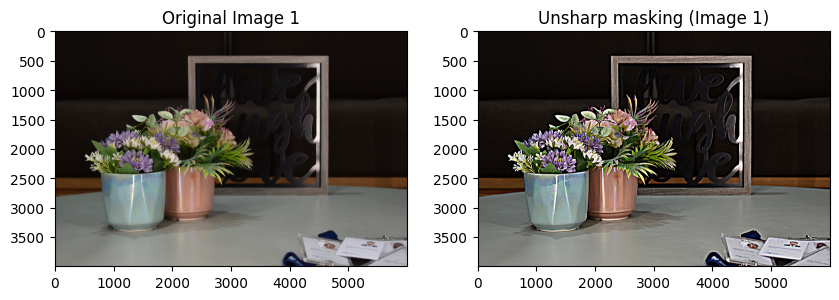

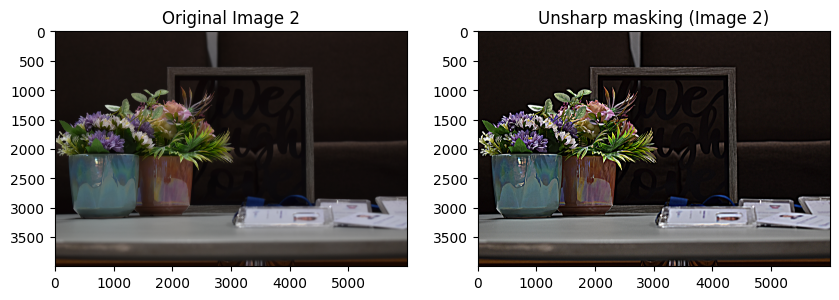

In [6]:
a = 2
# Image 1
sharp1 = img + (a * gau_mask1)
# Image 2
sharp2 = img2 + (a * gau_mask2)


fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(np.clip(img, 0, 255).astype(np.uint8))
axs[0].set_title("Original Image 1")
axs[1].imshow(np.clip(sharp1, 0, 255).astype(np.uint8))
axs[1].set_title("Unsharp masking (Image 1)")

fig, axs = plt.subplots(1, 2,figsize=(10, 5))
axs[0].imshow(np.clip(img2, 0, 255).astype(np.uint8))
axs[0].set_title("Original Image 2")
axs[1].imshow(np.clip(sharp2, 0, 255).astype(np.uint8))
axs[1].set_title("Unsharp masking (Image 2)")
